In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

import joblib
import pandas as pd
import numpy as np
import re
import os
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("../../traindata_2020_afterCovid.csv")
df_test = pd.read_csv("../../testdata_2021_afterCovid.csv")

In [3]:
# train set
reviews_train = list(df_train["clean_review"])
sentiments_train = list(df_train["sentiment"])
# test set
reviews_test = list(df_test["clean_review"])
sentiments_test = list(df_test["sentiment"])

In [4]:
# tfidf embedding
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True, ngram_range=(1,3), max_features=5000)

X_train = vectorizer.fit_transform(reviews_train)
y_train = np.array(sentiments_train)

X_test = vectorizer.transform(reviews_test)
y_test = np.array(sentiments_test)

In [5]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

In [6]:
print("Accuracy: %f" % accuracy_score(y_test, nb_pred))

Accuracy: 0.773466


Text(0.5, 257.44, 'Predicted label')

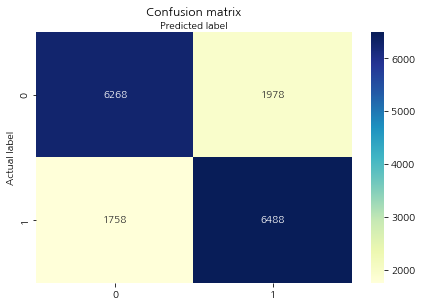

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, nb_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))
print("Precision:",metrics.precision_score(y_test, nb_pred))
print("Recall:",metrics.recall_score(y_test, nb_pred))
print("F1-score:",metrics.f1_score(y_test, nb_pred))

Accuracy: 0.7734659228716954
Precision: 0.7663595558705409
Recall: 0.7868057239873878
F1-score: 0.7764480612733364


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, nb_pred, target_names=['class low', 'class high']))

              precision    recall  f1-score   support

   class low       0.78      0.76      0.77      8246
  class high       0.77      0.79      0.78      8246

    accuracy                           0.77     16492
   macro avg       0.77      0.77      0.77     16492
weighted avg       0.77      0.77      0.77     16492



In [10]:
report = classification_report(y_test, nb_pred, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.780962,0.760126,0.770403,8246.000000
class high,0.766360,0.786806,0.776448,8246.000000
accuracy,0.773466,0.773466,0.773466,0.773466
macro avg,0.773661,0.773466,0.773426,16492.000000
weighted avg,0.773661,0.773466,0.773426,16492.000000


In [11]:
joblib.dump(nb, 'nb_TFIDF_afterCovid_0.773466')

['nb_TFIDF_afterCovid_0.773466']